Basic Statistical Description:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

Check for Null Values:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Aggregated Data:
         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


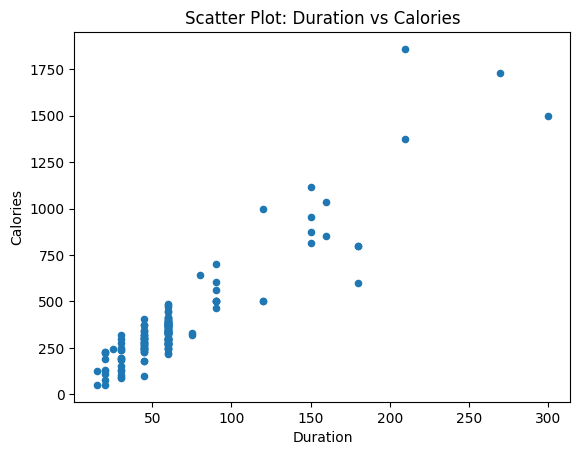

In [2]:
"""

1. Data Manipulation 

a. Read the provided CSV file ‘data.csv’. 
b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing 
c. Show the basic statistical description about the data. 
d. Check if the data has null values. 
    (i)Replace the null values with the mean 
e. Select at least two columns and aggregate the data using: min, max, count, mean. 
f.Filter the dataframe to select the rows with calories values between 500 and 1000. 
g.Filter the dataframe to select the rows with calories values > 500 and pulse < 100. 
h.Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”. 
i.Delete the “Maxpulse” column from the main df dataframe 
j.Convert the datatype of Calories column to int datatype. 
k.Using pandas create a scatter plot for the two columns (Duration and Calories).

"""

import pandas as pd
import matplotlib.pyplot as plt

# Read 'data.csv' file
file_path = 'data.csv'  
df = pd.read_csv(file_path)

# Shows basic statistical description
print("Basic Statistical Description:")
print(df.describe())

# Checks for null values
print("\nCheck for Null Values:")
print(df.isnull().sum())

# Replaces null values with the mean
df.fillna(df.mean(), inplace=True)

# Selects at least 2 columns and aggregate data
selected_columns = ['Duration', 'Calories']
aggregated_data = df[selected_columns].agg(['min', 'max', 'count', 'mean'])
print("\nAggregated Data:")
print(aggregated_data)

# Filter rows with calories values between 500 and 1000
filtered_df1 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]

# Filter rows with calories > 500 and pulse < 100
filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]

# Create a new dataframe df_modified without "Maxpulse" column
df_modified = df.drop(columns=['Maxpulse'])

# Delete "Maxpulse" column from the main dataframe df
df.drop(columns=['Maxpulse'], inplace=True)

# Convert the datatype of Calories column to int
df['Calories'] = df['Calories'].astype(int)

# Scatter plot for Duration and Calories
df.plot.scatter(x='Duration', y='Calories', title='Scatter Plot: Duration vs Calories')

# Display the plot
plt.show()


Dataset Preview:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

Mean Squared Error (Train): 29793161.08242297

Mean Squared Error (Test): 35301898.88713492


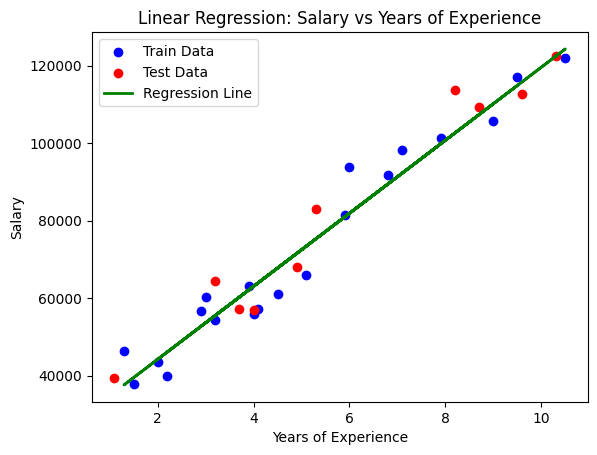

In [3]:
"""
2.Linear Regression 
 
a)Import the given “Salary_Data.csv” 
b)Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset. c) Train and predict the model. 
d)Calculate the mean_squared error 
e)Visualize both train and test data using scatter plot.
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the salary_data(2).csv file 
file_path = 'Salary_Data (2).csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Dataset Preview:")
print(df.head())

# Splitting the data into train and test partitions
X = df[['YearsExperience']]  # Feature (Independent variable)
y = df['Salary']  # Target (Dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on both train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Mean squared error for both train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("\nMean Squared Error (Train):", mse_train)
print("\nMean Squared Error (Test):", mse_test)

# Visualize train and test data using scatter plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
